In [1]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [2]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_5th Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
dropout (Dropout)    

In [3]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [4]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [5]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=600,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/600
175/175 [==============================] - 46s 265ms/step - loss: 1.9023 - categorical_accuracy: 0.2007 - val_loss: 1.5926 - val_categorical_accuracy: 0.3071
Epoch 2/600
175/175 [==============================] - 40s 226ms/step - loss: 1.5686 - categorical_accuracy: 0.3782 - val_loss: 1.3480 - val_categorical_accuracy: 0.5000
Epoch 3/600
175/175 [==============================] - 39s 225ms/step - loss: 1.4224 - categorical_accuracy: 0.4307 - val_loss: 1.2415 - val_categorical_accuracy: 0.5214
Epoch 4/600
175/175 [==============================] - 39s 225ms/step - loss: 1.3461 - categorical_accuracy: 0.4600 - val_loss: 1.1788 - val_categorical_accuracy: 0.5500
Epoch 5/600
175/175 [==============================] - 39s 225ms/step - loss: 1.2931 - categorical_accuracy: 0.4843 - val_loss: 1.1951 - val_categorical_accuracy: 0.5321
Epoch 6/600
175/175 [==============================] - 40s 230ms/step - loss: 1.2609 - categorical_acc

175/175 [==============================] - 35s 198ms/step - loss: 0.8134 - categorical_accuracy: 0.6896 - val_loss: 0.7349 - val_categorical_accuracy: 0.7071
Epoch 31/600
175/175 [==============================] - 35s 199ms/step - loss: 0.7832 - categorical_accuracy: 0.7000 - val_loss: 0.7326 - val_categorical_accuracy: 0.6929
Epoch 32/600
175/175 [==============================] - 34s 197ms/step - loss: 0.7952 - categorical_accuracy: 0.7004 - val_loss: 0.8418 - val_categorical_accuracy: 0.6893
Epoch 33/600
175/175 [==============================] - 35s 198ms/step - loss: 0.8150 - categorical_accuracy: 0.6921 - val_loss: 0.7587 - val_categorical_accuracy: 0.7071
Epoch 34/600
175/175 [==============================] - 35s 202ms/step - loss: 0.7533 - categorical_accuracy: 0.7257 - val_loss: 0.6535 - val_categorical_accuracy: 0.7571
Epoch 35/600
175/175 [==============================] - 34s 196ms/step - loss: 0.7552 - categorical_accuracy: 0.7207 - val_loss: 0.7544 - val_categorical_accu

175/175 [==============================] - 35s 202ms/step - loss: 0.5419 - categorical_accuracy: 0.8132 - val_loss: 0.6332 - val_categorical_accuracy: 0.7821
Epoch 61/600
175/175 [==============================] - 35s 201ms/step - loss: 0.5339 - categorical_accuracy: 0.8118 - val_loss: 0.6489 - val_categorical_accuracy: 0.7571
Epoch 62/600
175/175 [==============================] - 35s 200ms/step - loss: 0.4970 - categorical_accuracy: 0.8211 - val_loss: 0.5999 - val_categorical_accuracy: 0.7857
Epoch 63/600
175/175 [==============================] - 35s 201ms/step - loss: 0.5455 - categorical_accuracy: 0.8143 - val_loss: 0.6351 - val_categorical_accuracy: 0.7679
Epoch 64/600
175/175 [==============================] - 35s 200ms/step - loss: 0.5111 - categorical_accuracy: 0.8193 - val_loss: 0.5993 - val_categorical_accuracy: 0.7964
Epoch 65/600
175/175 [==============================] - 35s 200ms/step - loss: 0.5203 - categorical_accuracy: 0.8193 - val_loss: 0.5857 - val_categorical_accu

175/175 [==============================] - 35s 199ms/step - loss: 0.3465 - categorical_accuracy: 0.8861 - val_loss: 0.4830 - val_categorical_accuracy: 0.8393
Epoch 91/600
175/175 [==============================] - 35s 200ms/step - loss: 0.3737 - categorical_accuracy: 0.8814 - val_loss: 0.4998 - val_categorical_accuracy: 0.8393
Epoch 92/600
175/175 [==============================] - 35s 201ms/step - loss: 0.3644 - categorical_accuracy: 0.8718 - val_loss: 0.5800 - val_categorical_accuracy: 0.8179
Epoch 93/600
175/175 [==============================] - 35s 200ms/step - loss: 0.3758 - categorical_accuracy: 0.8768 - val_loss: 0.4659 - val_categorical_accuracy: 0.8536
Epoch 94/600
175/175 [==============================] - 35s 201ms/step - loss: 0.3554 - categorical_accuracy: 0.8846 - val_loss: 0.4933 - val_categorical_accuracy: 0.8357
Epoch 95/600
175/175 [==============================] - 36s 203ms/step - loss: 0.3356 - categorical_accuracy: 0.8896 - val_loss: 0.4828 - val_categorical_accu

175/175 [==============================] - 35s 200ms/step - loss: 0.2624 - categorical_accuracy: 0.9236 - val_loss: 0.5394 - val_categorical_accuracy: 0.8464
Epoch 121/600
175/175 [==============================] - 35s 200ms/step - loss: 0.2797 - categorical_accuracy: 0.9093 - val_loss: 0.5073 - val_categorical_accuracy: 0.8500
Epoch 122/600
175/175 [==============================] - 36s 205ms/step - loss: 0.2803 - categorical_accuracy: 0.9111 - val_loss: 0.3789 - val_categorical_accuracy: 0.8821
Epoch 123/600
175/175 [==============================] - 34s 196ms/step - loss: 0.2629 - categorical_accuracy: 0.9150 - val_loss: 0.4974 - val_categorical_accuracy: 0.8321
Epoch 124/600
175/175 [==============================] - 35s 201ms/step - loss: 0.2837 - categorical_accuracy: 0.9082 - val_loss: 0.3555 - val_categorical_accuracy: 0.8857
Epoch 125/600
175/175 [==============================] - 34s 196ms/step - loss: 0.2495 - categorical_accuracy: 0.9186 - val_loss: 0.4817 - val_categorical

175/175 [==============================] - 35s 199ms/step - loss: 0.2182 - categorical_accuracy: 0.9364 - val_loss: 0.5002 - val_categorical_accuracy: 0.8429
Epoch 151/600
175/175 [==============================] - 35s 199ms/step - loss: 0.2113 - categorical_accuracy: 0.9357 - val_loss: 0.4033 - val_categorical_accuracy: 0.8750
Epoch 152/600
175/175 [==============================] - 35s 199ms/step - loss: 0.2361 - categorical_accuracy: 0.9325 - val_loss: 0.4295 - val_categorical_accuracy: 0.8714
Epoch 153/600
175/175 [==============================] - 35s 198ms/step - loss: 0.1897 - categorical_accuracy: 0.9504 - val_loss: 0.4341 - val_categorical_accuracy: 0.8821
Epoch 154/600
175/175 [==============================] - 35s 199ms/step - loss: 0.2060 - categorical_accuracy: 0.9364 - val_loss: 0.4075 - val_categorical_accuracy: 0.8964
Epoch 155/600
175/175 [==============================] - 35s 198ms/step - loss: 0.2221 - categorical_accuracy: 0.9318 - val_loss: 0.4572 - val_categorical

Epoch 180/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1655 - categorical_accuracy: 0.9561 - val_loss: 0.4934 - val_categorical_accuracy: 0.8571
Epoch 181/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1765 - categorical_accuracy: 0.9493 - val_loss: 0.4983 - val_categorical_accuracy: 0.8786
Epoch 182/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1632 - categorical_accuracy: 0.9525 - val_loss: 0.4749 - val_categorical_accuracy: 0.8821
Epoch 183/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1557 - categorical_accuracy: 0.9561 - val_loss: 0.4263 - val_categorical_accuracy: 0.8929
Epoch 184/600
175/175 [==============================] - 34s 195ms/step - loss: 0.1775 - categorical_accuracy: 0.9493 - val_loss: 0.3912 - val_categorical_accuracy: 0.8857
Epoch 185/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1911 - categorical_accuracy: 0.9436 - val_loss: 0.4335 - v

175/175 [==============================] - 34s 196ms/step - loss: 0.1467 - categorical_accuracy: 0.9589 - val_loss: 0.3689 - val_categorical_accuracy: 0.9036
Epoch 210/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1408 - categorical_accuracy: 0.9593 - val_loss: 0.4497 - val_categorical_accuracy: 0.8964
Epoch 211/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1653 - categorical_accuracy: 0.9532 - val_loss: 0.4258 - val_categorical_accuracy: 0.8821
Epoch 212/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1186 - categorical_accuracy: 0.9700 - val_loss: 0.4537 - val_categorical_accuracy: 0.9071
Epoch 213/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1430 - categorical_accuracy: 0.9636 - val_loss: 0.4658 - val_categorical_accuracy: 0.8893
Epoch 214/600
175/175 [==============================] - 34s 195ms/step - loss: 0.1325 - categorical_accuracy: 0.9625 - val_loss: 0.5532 - val_categorical

Epoch 239/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1143 - categorical_accuracy: 0.9682 - val_loss: 0.3638 - val_categorical_accuracy: 0.9071
Epoch 240/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1243 - categorical_accuracy: 0.9714 - val_loss: 0.4820 - val_categorical_accuracy: 0.8750
Epoch 241/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1089 - categorical_accuracy: 0.9721 - val_loss: 0.4468 - val_categorical_accuracy: 0.9000
Epoch 242/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1429 - categorical_accuracy: 0.9621 - val_loss: 0.3949 - val_categorical_accuracy: 0.9000
Epoch 243/600
175/175 [==============================] - 34s 195ms/step - loss: 0.1278 - categorical_accuracy: 0.9629 - val_loss: 0.3679 - val_categorical_accuracy: 0.9071
Epoch 244/600
175/175 [==============================] - 34s 195ms/step - loss: 0.1579 - categorical_accuracy: 0.9600 - val_loss: 0.3591 - v

175/175 [==============================] - 35s 198ms/step - loss: 0.0902 - categorical_accuracy: 0.9761 - val_loss: 0.4466 - val_categorical_accuracy: 0.9000
Epoch 270/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0939 - categorical_accuracy: 0.9771 - val_loss: 0.4497 - val_categorical_accuracy: 0.9036
Epoch 271/600
175/175 [==============================] - 35s 200ms/step - loss: 0.0896 - categorical_accuracy: 0.9771 - val_loss: 0.5193 - val_categorical_accuracy: 0.9071
Epoch 272/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1035 - categorical_accuracy: 0.9725 - val_loss: 0.4480 - val_categorical_accuracy: 0.8929
Epoch 273/600
175/175 [==============================] - 35s 200ms/step - loss: 0.1119 - categorical_accuracy: 0.9746 - val_loss: 0.4984 - val_categorical_accuracy: 0.8750
Epoch 274/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1301 - categorical_accuracy: 0.9636 - val_loss: 0.3372 - val_categorical

175/175 [==============================] - 35s 199ms/step - loss: 0.1024 - categorical_accuracy: 0.9754 - val_loss: 0.5591 - val_categorical_accuracy: 0.8857
Epoch 300/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1060 - categorical_accuracy: 0.9732 - val_loss: 0.3611 - val_categorical_accuracy: 0.9214
Epoch 301/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0773 - categorical_accuracy: 0.9864 - val_loss: 0.5740 - val_categorical_accuracy: 0.8893
Epoch 302/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1073 - categorical_accuracy: 0.9746 - val_loss: 0.5331 - val_categorical_accuracy: 0.8821
Epoch 303/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0976 - categorical_accuracy: 0.9750 - val_loss: 0.4914 - val_categorical_accuracy: 0.9036
Epoch 304/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0810 - categorical_accuracy: 0.9793 - val_loss: 0.4913 - val_categorical

175/175 [==============================] - 35s 199ms/step - loss: 0.0792 - categorical_accuracy: 0.9811 - val_loss: 0.3800 - val_categorical_accuracy: 0.9214
Epoch 330/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0840 - categorical_accuracy: 0.9793 - val_loss: 0.5159 - val_categorical_accuracy: 0.8964
Epoch 331/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0731 - categorical_accuracy: 0.9825 - val_loss: 0.4022 - val_categorical_accuracy: 0.9214
Epoch 332/600
175/175 [==============================] - 35s 199ms/step - loss: 0.0873 - categorical_accuracy: 0.9775 - val_loss: 0.3405 - val_categorical_accuracy: 0.9250
Epoch 333/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1032 - categorical_accuracy: 0.9746 - val_loss: 0.4597 - val_categorical_accuracy: 0.9143
Epoch 334/600
175/175 [==============================] - 35s 199ms/step - loss: 0.1060 - categorical_accuracy: 0.9725 - val_loss: 0.3303 - val_categorical

175/175 [==============================] - 34s 196ms/step - loss: 0.0993 - categorical_accuracy: 0.9771 - val_loss: 0.4285 - val_categorical_accuracy: 0.9250
Epoch 360/600
175/175 [==============================] - 34s 196ms/step - loss: 0.0807 - categorical_accuracy: 0.9775 - val_loss: 0.3602 - val_categorical_accuracy: 0.9107
Epoch 361/600
175/175 [==============================] - 34s 196ms/step - loss: 0.0691 - categorical_accuracy: 0.9821 - val_loss: 0.4533 - val_categorical_accuracy: 0.9107
Epoch 362/600
175/175 [==============================] - 34s 196ms/step - loss: 0.1265 - categorical_accuracy: 0.9686 - val_loss: 0.3610 - val_categorical_accuracy: 0.9107
Epoch 363/600
175/175 [==============================] - 34s 196ms/step - loss: 0.0903 - categorical_accuracy: 0.9786 - val_loss: 0.5177 - val_categorical_accuracy: 0.8893
Epoch 364/600
175/175 [==============================] - 34s 196ms/step - loss: 0.0936 - categorical_accuracy: 0.9779 - val_loss: 0.5338 - val_categorical

175/175 [==============================] - 41s 234ms/step - loss: 0.0649 - categorical_accuracy: 0.9864 - val_loss: 0.3703 - val_categorical_accuracy: 0.9071
Epoch 390/600
175/175 [==============================] - 40s 230ms/step - loss: 0.0596 - categorical_accuracy: 0.9864 - val_loss: 0.4096 - val_categorical_accuracy: 0.9179
Epoch 391/600
175/175 [==============================] - 40s 229ms/step - loss: 0.0926 - categorical_accuracy: 0.9746 - val_loss: 0.4172 - val_categorical_accuracy: 0.9071
Epoch 392/600
175/175 [==============================] - 40s 231ms/step - loss: 0.0735 - categorical_accuracy: 0.9832 - val_loss: 0.4817 - val_categorical_accuracy: 0.9143
Epoch 393/600
175/175 [==============================] - 40s 231ms/step - loss: 0.1167 - categorical_accuracy: 0.9707 - val_loss: 0.3617 - val_categorical_accuracy: 0.9179
Epoch 394/600
175/175 [==============================] - 40s 230ms/step - loss: 0.0792 - categorical_accuracy: 0.9814 - val_loss: 0.4130 - val_categorical

Epoch 419/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0754 - categorical_accuracy: 0.9829 - val_loss: 0.5365 - val_categorical_accuracy: 0.8964
Epoch 420/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0579 - categorical_accuracy: 0.9864 - val_loss: 0.5289 - val_categorical_accuracy: 0.8929
Epoch 421/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0512 - categorical_accuracy: 0.9871 - val_loss: 0.6392 - val_categorical_accuracy: 0.8929
Epoch 422/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0706 - categorical_accuracy: 0.9825 - val_loss: 0.4660 - val_categorical_accuracy: 0.9250
Epoch 423/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0620 - categorical_accuracy: 0.9846 - val_loss: 0.4640 - val_categorical_accuracy: 0.9071
Epoch 424/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0529 - categorical_accuracy: 0.9904 - val_loss: 0.3695 - v

175/175 [==============================] - 33s 188ms/step - loss: 0.0673 - categorical_accuracy: 0.9829 - val_loss: 0.3475 - val_categorical_accuracy: 0.9036
Epoch 450/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0699 - categorical_accuracy: 0.9839 - val_loss: 0.3879 - val_categorical_accuracy: 0.9143
Epoch 451/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0405 - categorical_accuracy: 0.9936 - val_loss: 0.5581 - val_categorical_accuracy: 0.9107
Epoch 452/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0567 - categorical_accuracy: 0.9882 - val_loss: 0.6404 - val_categorical_accuracy: 0.9000
Epoch 453/600
175/175 [==============================] - 33s 187ms/step - loss: 0.1035 - categorical_accuracy: 0.9754 - val_loss: 0.5922 - val_categorical_accuracy: 0.8964
Epoch 454/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0625 - categorical_accuracy: 0.9886 - val_loss: 0.4183 - val_categorical

Epoch 479/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0551 - categorical_accuracy: 0.9896 - val_loss: 0.4107 - val_categorical_accuracy: 0.9214
Epoch 480/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0614 - categorical_accuracy: 0.9868 - val_loss: 0.4847 - val_categorical_accuracy: 0.9071
Epoch 481/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0624 - categorical_accuracy: 0.9861 - val_loss: 0.4857 - val_categorical_accuracy: 0.9071
Epoch 482/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0381 - categorical_accuracy: 0.9946 - val_loss: 0.3631 - val_categorical_accuracy: 0.9143
Epoch 483/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0830 - categorical_accuracy: 0.9836 - val_loss: 0.4937 - val_categorical_accuracy: 0.9036
Epoch 484/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0757 - categorical_accuracy: 0.9800 - val_loss: 0.3330 - v

Epoch 509/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0497 - categorical_accuracy: 0.9907 - val_loss: 0.4454 - val_categorical_accuracy: 0.9143
Epoch 510/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0387 - categorical_accuracy: 0.9918 - val_loss: 0.5808 - val_categorical_accuracy: 0.9036
Epoch 511/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0676 - categorical_accuracy: 0.9832 - val_loss: 0.5358 - val_categorical_accuracy: 0.9071
Epoch 512/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0666 - categorical_accuracy: 0.9889 - val_loss: 0.4374 - val_categorical_accuracy: 0.9357
Epoch 513/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0417 - categorical_accuracy: 0.9918 - val_loss: 0.4810 - val_categorical_accuracy: 0.9143
Epoch 514/600
175/175 [==============================] - 33s 188ms/step - loss: 0.0785 - categorical_accuracy: 0.9789 - val_loss: 0.5171 - v

175/175 [==============================] - 33s 187ms/step - loss: 0.0450 - categorical_accuracy: 0.9900 - val_loss: 0.3865 - val_categorical_accuracy: 0.9214
Epoch 540/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0911 - categorical_accuracy: 0.9786 - val_loss: 0.4522 - val_categorical_accuracy: 0.9179
Epoch 541/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0318 - categorical_accuracy: 0.9957 - val_loss: 0.3761 - val_categorical_accuracy: 0.9179
Epoch 542/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0368 - categorical_accuracy: 0.9946 - val_loss: 0.3483 - val_categorical_accuracy: 0.9143
Epoch 543/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0912 - categorical_accuracy: 0.9804 - val_loss: 0.3556 - val_categorical_accuracy: 0.9286
Epoch 544/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0590 - categorical_accuracy: 0.9857 - val_loss: 0.2833 - val_categorical

175/175 [==============================] - 33s 187ms/step - loss: 0.0339 - categorical_accuracy: 0.9946 - val_loss: 0.5139 - val_categorical_accuracy: 0.9107
Epoch 570/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0583 - categorical_accuracy: 0.9886 - val_loss: 0.4923 - val_categorical_accuracy: 0.8964
Epoch 571/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0573 - categorical_accuracy: 0.9879 - val_loss: 0.3237 - val_categorical_accuracy: 0.9357
Epoch 572/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0404 - categorical_accuracy: 0.9911 - val_loss: 0.6500 - val_categorical_accuracy: 0.8857
Epoch 573/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0557 - categorical_accuracy: 0.9857 - val_loss: 0.5474 - val_categorical_accuracy: 0.9071
Epoch 574/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0380 - categorical_accuracy: 0.9911 - val_loss: 0.5232 - val_categorical

175/175 [==============================] - 33s 187ms/step - loss: 0.0543 - categorical_accuracy: 0.9893 - val_loss: 0.3419 - val_categorical_accuracy: 0.9179
Epoch 600/600
175/175 [==============================] - 33s 187ms/step - loss: 0.0458 - categorical_accuracy: 0.9911 - val_loss: 0.4177 - val_categorical_accuracy: 0.8964


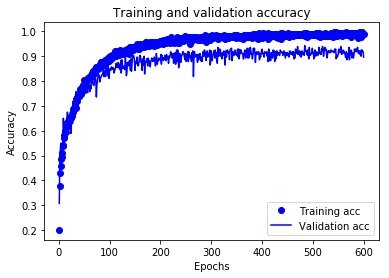

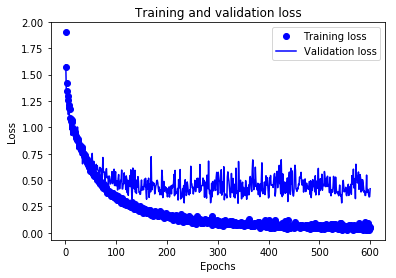

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_5th Experiment.h5')

In [8]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 4s 125ms/step - loss: 0.3922 - categorical_accuracy: 0.9232
Test-set accuracy: 92.32%


In [9]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [10]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 3s 5ms/sample - loss: 0.3922 - categorical_accuracy: 0.9232
Loss on test set:  0.3921712009768401
Accuracy on test set:  0.92321426


In [11]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 2s 4ms/sample
(560, 1)
(560, 1)


<Figure size 3600x2400 with 0 Axes>

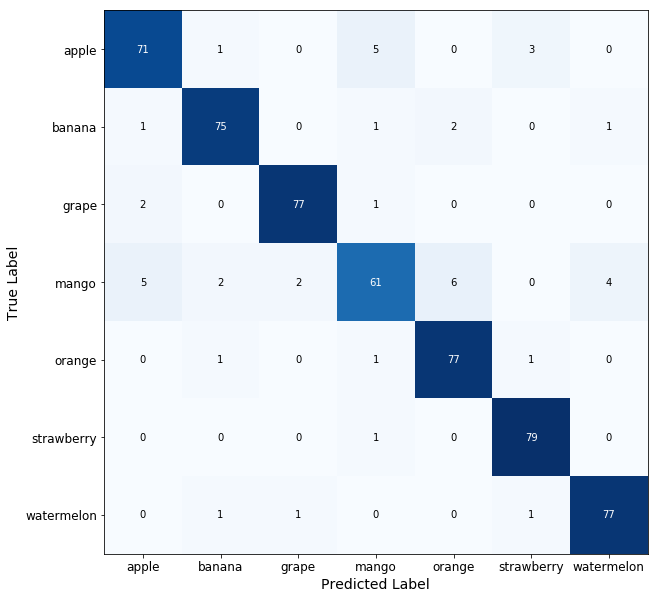

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure(dpi=600)
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.xlabel('Predicted Label',fontsize=14)
plt.ylabel('True Label',fontsize=14)
plt.savefig('IndusNet_7 classes_100_100_5th Experiment.jpeg',dpi=1200)
plt.show()